<a href="https://colab.research.google.com/github/ritu-yadav/Calories-Burnt-Prediction/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8     231.0
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3      66.0
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7      26.0
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5      71.0
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8      35.0
(15000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Bod

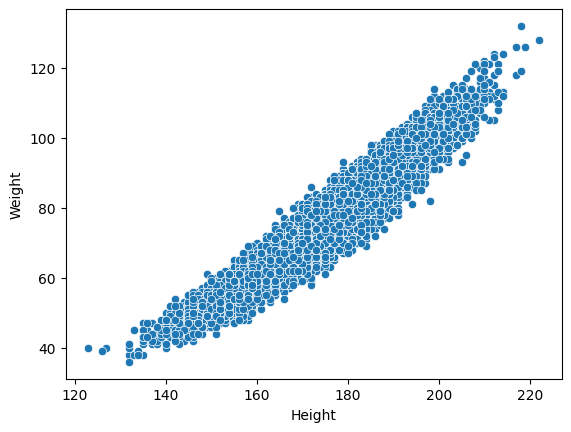

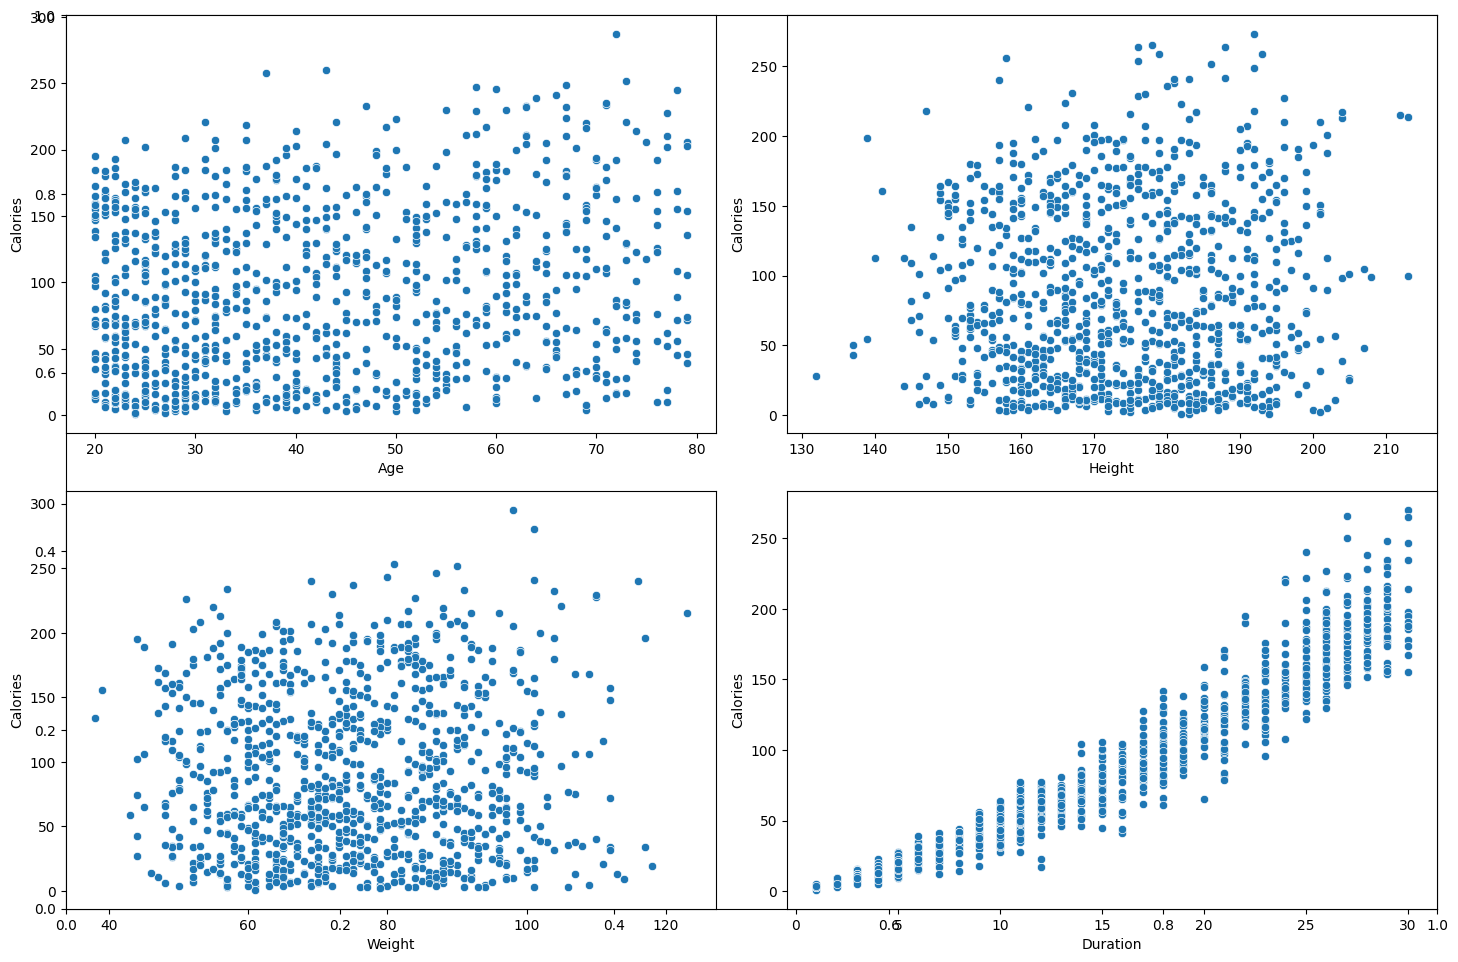

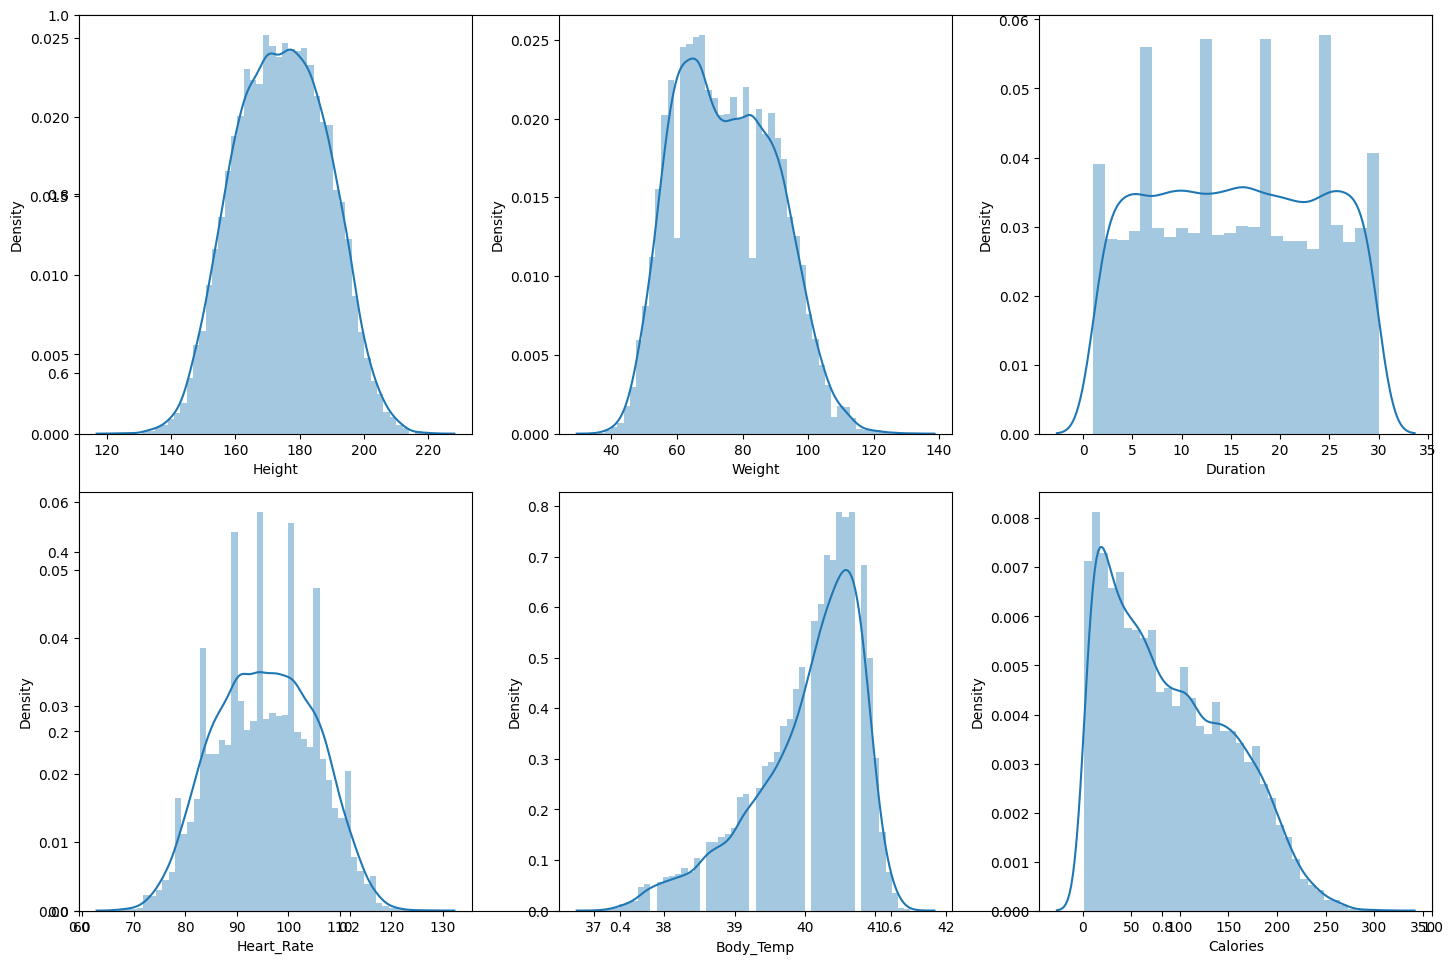

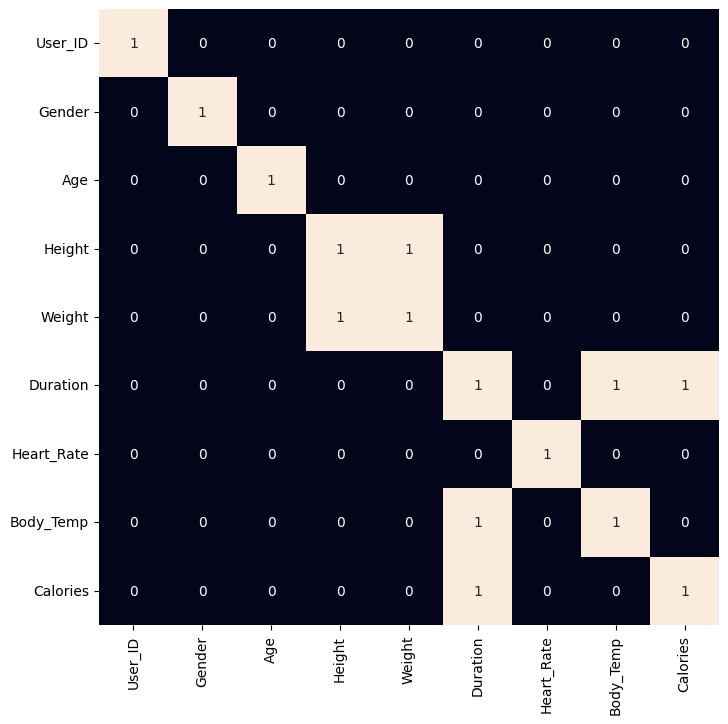

(13500, 5) (1500, 5)
LinearRegression() :
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) :
Training Error :  7.89463304294701
Validation Error :  10.12050432946533

Lasso() :
Training Error :  17.915089584958036
Validation 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("calories.csv")
print(df.head())
print(df.shape)
print(df.info())
print(df.describe)

sb.scatterplot(x='Height',y='Weight',data=df)
plt.show()

features =['Age','Height','Weight','Duration']

plt.subplots(figsize=(15,10))
for i,col in enumerate(features):
  plt.subplot(2,2,i+1)
  x=df.sample(1000)
  sb.scatterplot(x=col,y='Calories',data=x)

plt.tight_layout()
plt.show()

features =df.select_dtypes(include='float').columns
plt.subplots(figsize=(15,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])

plt.tight_layout()
plt.show()

df.replace({'male':0,'female':1},inplace=True)
df.head()

plt.figure(figsize=(8,8))
sb.heatmap(df.corr() >0.9,annot=True,cbar=False)

plt.show()

to_remove =['Weight','Duration']
df.drop(to_remove,axis=1,inplace=True)

features = df.drop(['User_ID','Calories'],axis=1)
target=df['Calories'].values

X_train,X_val,Y_train,Y_val = train_test_split(features,target,test_size=0.1,random_state=22)
print(X_train.shape,X_val.shape)

scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val =scaler.transform(X_val)


from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(),XGBRegressor(),Lasso(),RandomForestRegressor(),Ridge()]

for i in range(5):
  models[i].fit(X_train,Y_train)
  print(f'{models[i]} :')

  train_preds =models[i].predict(X_train)
  print('Training Error : ' ,mae(Y_train,train_preds))

  val_preds =models[i].predict(X_val)
  print('Validation Error : ',mae(Y_val,val_preds))
  print()